In [1]:
import tensorflow as tf
import csv
#import matplotlib.pyplot as plt
from time import time
import os
import cv2
import numpy as np
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

In [2]:
num_classes = 8
channels=3
img_rows=64
img_cols=64
img_pixel=(img_rows*img_cols*channels)
trainEpochs =20#執行15次訓練週期
batchSize = 20 #每一批次比數100
photo_channel=39

In [3]:
image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")

def list_images(basePath, contains=None):
    # 返回有效的图片路径数据集
    return list_files(basePath, validExts=image_types, contains=contains)
 
def list_files(basePath, validExts=None, contains=None):
    # 遍历图片数据目录，生成每张图片的路径
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # 循环遍历当前目录中的文件名
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue
 
            # 通过确定.的位置，从而确定当前文件的文件扩展名
            ext = filename[filename.rfind("."):].lower()
 
            # 检查文件是否为图像，是否应进行处理
            if validExts is None or ext.endswith(validExts):
                # 构造图像路径
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [4]:
print("------load data------")
path1 = 'C:/Users/eric/Desktop/ML/2HW/CIFAR10/'
data = []
labels = []

# 路徑
imagePaths = sorted(list(list_images(path1)))
random.seed(10)
random.shuffle(imagePaths)
 
# 讀取
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_rows,img_cols))
    data.append(image)
    
    # 建立label
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

(x_train, x_test, y_train, y_test) = train_test_split(data,
     labels, test_size=0.2, random_state=42)

#將y_test、y_train轉換成(總數,標籤)，若無lb，則只會顯示(總數) 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

print("------load success------")

------load data------
------load success------


In [5]:
model = Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),
                  input_shape=(64,64,3),
                  activation='relu',
                  padding='same'))

model.add(Dropout(rate=0.25))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',
                  padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))



model.add(Dense(y_train.shape[1],activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# H = model.fit(x=x_train,
#                           y=y_train,
#                           validation_split=0,
#                           epochs=trainEpochs,
#                           batch_size=batchSize,
#                           verbose=1)
H = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
              epochs=trainEpochs, batch_size=batchSize)

Epoch 1/20
2400/2400 [==============================] - 652s 269ms/step - loss: 0.2641 - accuracy: 0.3924 - val_loss: 0.1988 - val_accuracy: 0.5834
Epoch 2/20
2400/2400 [==============================] - 642s 267ms/step - loss: 0.1830 - accuracy: 0.6008 - val_loss: 0.1784 - val_accuracy: 0.6320
Epoch 3/20
2400/2400 [==============================] - 642s 267ms/step - loss: 0.1553 - accuracy: 0.6764 - val_loss: 0.1660 - val_accuracy: 0.6560
Epoch 4/20
2400/2400 [==============================] - 608s 253ms/step - loss: 0.1336 - accuracy: 0.7305 - val_loss: 0.1572 - val_accuracy: 0.6856
Epoch 5/20
2400/2400 [==============================] - 615s 256ms/step - loss: 0.1141 - accuracy: 0.7806 - val_loss: 0.1506 - val_accuracy: 0.6913
Epoch 6/20
2400/2400 [==============================] - 645s 269ms/step - loss: 0.0969 - accuracy: 0.8202 - val_loss: 0.1456 - val_accuracy: 0.7000
Epoch 7/20
2400/2400 [==============================] - 590s 246ms/step - loss: 0.0828 - accuracy: 0.8549 - val_

              precision    recall  f1-score   support

    airplane       0.71      0.81      0.76      1190
  automobile       0.84      0.83      0.83      1247
        bird       0.61      0.58      0.59      1186
         cat       0.54      0.48      0.51      1239
        deer       0.58      0.74      0.65      1229
         dog       0.68      0.47      0.56      1203
        frog       0.70      0.83      0.76      1169
       horse       0.79      0.74      0.76      1182
        ship       0.82      0.80      0.81      1154
       truck       0.79      0.76      0.77      1201

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



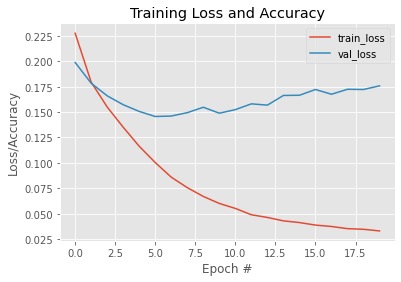

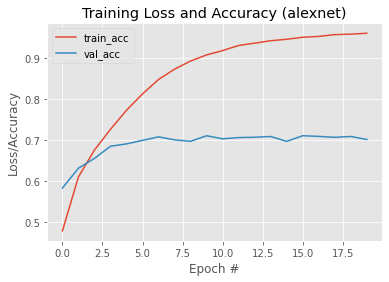

In [7]:
from sklearn.metrics import classification_report
("[INFO] evaluating network...")
predictions = model.predict(x=x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy
N = np.arange(0, trainEpochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.savefig("C:/Users/eric/Desktop/ML/2HW/demo/")

plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (alexnet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("C:/Users/eric/Desktop/ML/2HW/demo/")